Osnabrück University - A&C: Computational Cognition (Summer Term 2019)

# Exercise Sheet 04: Analysis of behavioural data (part 2)

## Introduction

This week's sheet should be solved and handed in at 14:00 at **Tuesday, May 14, 2019**. If you need help (and Google and other resources were not enough), feel free to contact your tutors. Please push your results to your Github group folder.

In this exercise sheet we will have a closer look on the data of Seahaven using analysing techniques like ANOVA, linear regression models and t-tests. For the correct results we will provide you with the finalized data that you only have to read in. Note that especially the data for assignment 2 and 3 underwent some further preprocesing than what we did in the previous exercise.

## Assignment 0: Peer review for sheet 03 [3 pts]

Open an issue in the repository of the groups you have to check. The title of the issue should be your group name (e.g. "Group1). Comment on what was good and what was bad, the aesthetics and ease of reading the plots, what you would have done differently and how many points you would give them for their solutions.

| * |Group 1|Group 2|Group 3|Group 4|Group 5|Group 6|Group 7|Group 8|Group 9|Group 10|Group 11|
| ------- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ------ | ------ |
| check solutions of group: | 6, 2 | 10, 7  | 1, 6  | 8, 9 | 7, 1 | 9, 8 | 3, 10  | 5, 11  | 4, 3  | 11, 5 | 2, 4  |

Please also evaluate nice coding style with up to two points.

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ptitprince as pt
import seaborn as sns
sns.set()
from PIL import Image
from scipy import stats
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.api import anova_lm
from statsmodels.formula.api import ols

In [37]:
# use pd.set_option here to display in a nice way
# only display 30 rows
pd.set_option("display.max_rows", 30)
# displays precision for decimal numbers
pd.set_option("display.precision", 3)
pd.set_option('mode.chained_assignment', None)

## Assignment 1: Linear Regression Model Based on Performance and Reaction Time [2 pts]

Although the linear regression in the prior exercise sheet (assignment 2.a) does not suggest a relationship between RT and performance (accuracy) for the relative task, we still want to check how much of the performance is explained by the RT. To do so we fit a linear regression model by using the ```ols``` method in the ```statsmodels``` library for both of the time conditions (3sec and Infinite).

- Read ```AllData.csv``` into the dataframe ```AllData``` and take only the data of the relative task. 
- Split the data of the relative task: Create ```SecData``` with the data of the 3sec-condition and ```InfData``` with the data of the Infinite-condition.
- For each dataset (SecData, InfData) use the ```statsmodels```’ ```ols``` function to initialise a simple linear regression model. <br> The ```ols``` function takes the following: **ols("y ~ X", df)**, where X is the predictor variable ("ReactionTime"), y is the output variable ("Performance") and df is the dataframe of the used data.
- Have a look on the R-squared values and interpret them.

Take a look at the [ols documentation](https://www.statsmodels.org/stable/index.html) and the [patsy documentation](https://patsy.readthedocs.io/en/v0.1.0/formulas.html) to get a feeling how to use the function.

In [117]:
path = 'Data/AllData.csv'
all_Data = pd.read_csv(path)

all_Data = all_Data[all_Data['Task'] == 'Relative']

SecData  = all_Data[all_Data['Time'] == '3sec']
InfData  = all_Data[all_Data['Time'] == 'Infinite']

linear_sec = ols('Performance ~ ReactionTime', data=SecData).fit()
print(linear_sec.summary())

linear_infinite = ols('Performance ~ ReactionTime', data=InfData).fit()
print(linear_infinite.summary())



                            OLS Regression Results                            
Dep. Variable:            Performance   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     4.195
Date:                Thu, 09 May 2019   Prob (F-statistic):             0.0433
Time:                        18:36:04   Log-Likelihood:                 78.822
No. Observations:                  97   AIC:                            -153.6
Df Residuals:                      95   BIC:                            -148.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4099      0.065      6.330   

## Assignment 2: Testing Task Performance via ANOVA [5 pts]

For this assignment we will have a look on the whole data without caring about the different measurements.

### a) Task Performance [2 pts]

Refering to our plots of the prior exercise sheet (assignment 2.b), it is a good idea to have a closer look on the task performance (accuracy) to check if there are some **significant effects, i.e. p < 0.05**. To do so we will first of all visualize the data with a raincloud-plot using ```ptitprince.RainCloud``` as a density estimate and then calculate the ANOVAs. Make sure to run ```pip install ptitprince``` in your activated acc environment beforehand.

- Read ```MapPerformances.csv``` into the dataframe ```AllPerformances```.
- Make a RainCloud-plot of the tasks (x-axis) and performance (y-axis) for both time conditions (3sec / Infinite). The y-axis should start at 0.25 and end at 0.75.
- Have a look at ```help(pt.RainCloud)``` to get an overview of the different parameters that you can modify to create a nice raincloud-plot.

(0.25, 0.75)

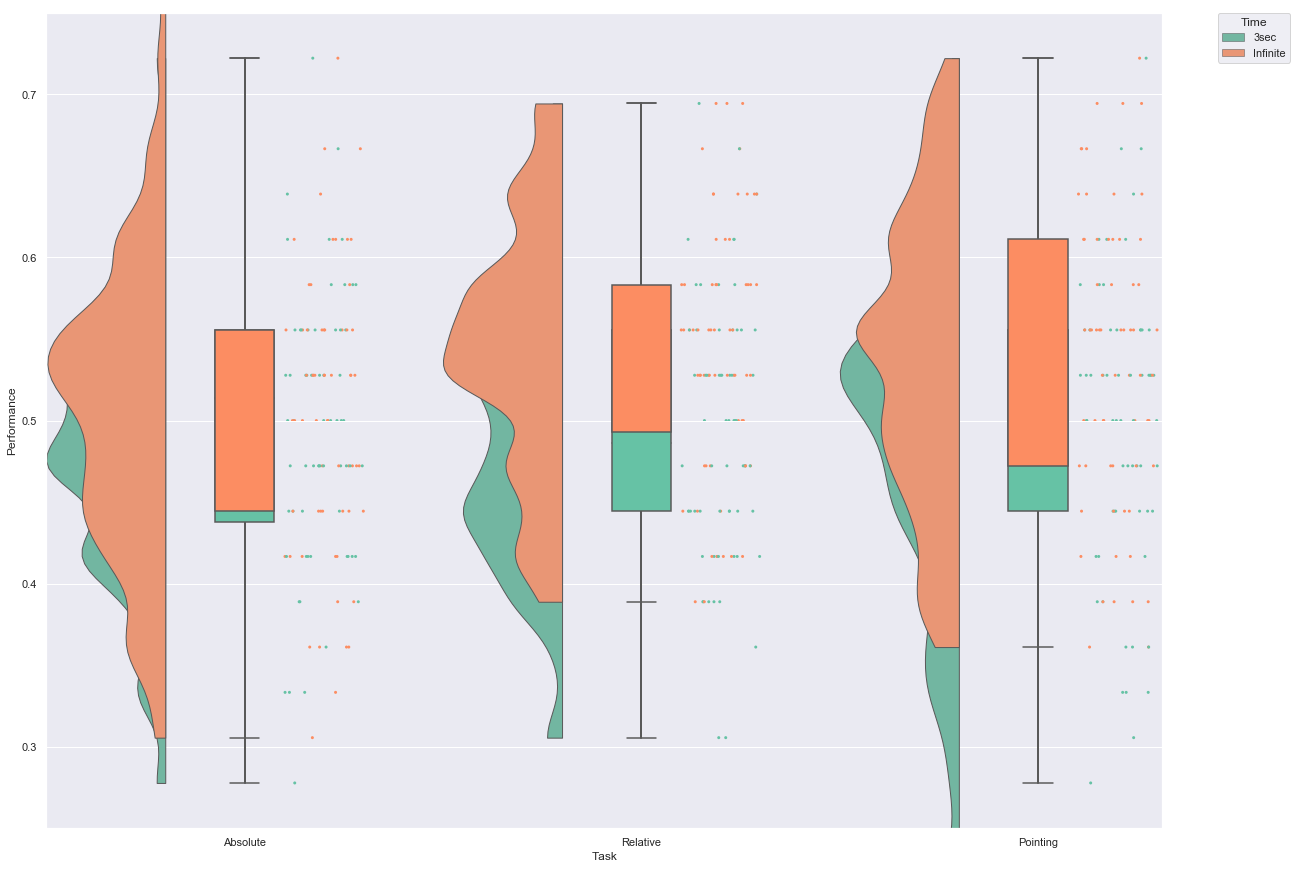

In [141]:

path_map = 'Data/MapPerformances.csv'
AllPerformances= pd.read_csv(path_map)
ax=pt.RainCloud(x = 'Task',
                y = 'Performance',
                hue = 'Time',
                figsize = (20,15), 
                data = AllPerformances,
                width_viol = .6, 
                move = .2)
ax.set_ylim([0.25, 0.75])


Using the data of ```AllPerformances``` we now want to calculate a **two-way ANOVA**. A two-way ANOVA is a statistical test used to determine the effect of two nominal predictor variables (= independent variables) on a continuous outcome variable (= dependent variable).

H$_{01}$ = The performance is the same for the different tasks. <br>
H$_{02}$ = The performance is the same for the different time conditions. <br>
H$_{03}$ = An interaction effect does not exist.

- Given the null hypotheses above, what is the outcome variable and what are the predictor variables that you have to use for the two-way ANOVA?
- Use ```statsmodels```’ ```ols``` function to create an ordinary least squares model as a precursor to the ANOVA. <br> The ```ols``` function takes the following: **ols("y ~ C(X1) * C(X2)", df)**, where X1 and X2 are the predictor variables, y is the output variable and df is the dataframe of the used data.
- With the result of the ols calculate a **type 2** two-way ANOVA using ```statsmodels```’ ```anova_lm```.
- Based on the ANOVA table explain which of the null hypotheses can be rejected. What does this outcome tell you?

Take a look at the [ols documentation](https://www.statsmodels.org/stable/index.html), the [patsy documentation](https://patsy.readthedocs.io/en/v0.1.0/formulas.html) and the [anova_lm documentation](http://www.statsmodels.org/dev/anova.html) to get a feeling how to use these functions.

In [69]:
model = ols('Performance ~ C(Task) + C(Time) + C(Task)* C(Time)', AllPerformances).fit()

model.summary()

res = anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(Task),0.021,2.0,1.323,2.675e-01
C(Time),0.146,1.0,18.690,1.970e-05
C(Task):C(Time),0.028,2.0,1.754,1.744e-01
Residual,2.963,378.0,NaN,NaN


### b) Task Performance: 3sec Condition vs. Infinite Condition [3 pts]

Let's take a closer look onto the single time conditions by calculating a **one-way ANOVA** for each time condition (3sec and Infinite). A one-way ANOVA is a statistical test used to determine the effect of one nominal predictor variable (= independent variable) on a continuous outcome variable (= dependent variable). 

H$_{01}$ = The performance is the same for the different tasks. <br>

- Use the data of ```AllPerformances``` and split it: Create ```SecPerformances``` with the data of the 3sec-condition and ```InfPerformances``` with the data of the Infinite-condition.
- Given the null hypothesis above, what is the outcome variable and what is the predictor variable that you have to use for the one-way ANOVAs?

Do for each dataset (SecPerformances, InfPerformances):

- Use ```statsmodels```’ ```ols``` function to create an ordinary least squares model as a precursor to the ANOVA. The ```ols``` function takes the formula <br> The ```ols``` function takes the following: **ols("y ~ C(X)", df)**, where X is the predictor variable, y is the output variable and df is the dataframe of the used data.
- With the result of the ols calculate a **type 1** one-way ANOVA using ```statsmodels```’ ```anova_lm```.
- Based on the ANOVA table explain if the null hypothesis can be rejected. What does this outcome tell you?

Take a look at the [ols documentation](https://www.statsmodels.org/stable/index.html) and the [patsy documentation](https://patsy.readthedocs.io/en/v0.1.0/formulas.html) to get a feeling how to use this function.

In [126]:
SecPerformances  = AllPerformances[AllPerformances['Time'] == '3sec']
InfPerformances  = AllPerformances[AllPerformances['Time'] == 'Infinite']


results_sec = ols('Performance ~ C(Task)', data=SecPerformances).fit()
results_sec.summary()

aov_table_sec = anova_lm(results_sec, typ=1)


results_inf = ols('Performance ~ C(Task)', data=InfPerformances).fit()
results_inf.summary()

aov_table_inf = anova_lm(results_inf, typ=1)
print(aov_table_inf)
print(aov_table_sec)

             df  sum_sq  mean_sq      F  PR(>F)
C(Task)     2.0   0.048    0.024  3.128   0.046
Residual  189.0   1.438    0.008    NaN     NaN
             df     sum_sq    mean_sq      F  PR(>F)
C(Task)     2.0  6.350e-04  3.175e-04  0.039   0.961
Residual  189.0  1.524e+00  8.066e-03    NaN     NaN


If there is a significant outcome for one of the datasets (SecPerformances or InfPerformances), make a post-hoc paired t-test using this dataset.

- Extract the performances for each task (Absolute, Relative, Pointing).
- Compare the performances of the different tasks pairwise using ```scipy.stats.ttest_rel```
- Why do we need to do further post-hoc tests and what do they tell us?

In [99]:
abs_Performances  = AllPerformances[AllPerformances['Task'] == 'Absolute']
abs_Performances  = abs_Performances.iloc[:,3]

rel_Performances  = AllPerformances[AllPerformances['Task'] == 'Relative']
rel_Performances  = rel_Performances.iloc[:,3]

point_Performances  = AllPerformances[AllPerformances['Task'] == 'Pointing']
point_Performances  = point_Performances.iloc[:,3]



print("Absolute - Relative: "+str(stats.ttest_rel(abs_Performances,rel_Performances)))
print("Absolute - Pointing: "+str(stats.ttest_rel(abs_Performances, point_Performances)))
print("Relative - Pointing: "+str(stats.ttest_rel(rel_Performances,point_Performances)))

Absolute - Relative: Ttest_relResult(statistic=-1.7012516171107577, pvalue=0.09134284868120675)
Absolute - Pointing: Ttest_relResult(statistic=-1.1442675167753094, pvalue=0.25466478013887206)
Relative - Pointing: Ttest_relResult(statistic=0.42490296181258913, pvalue=0.6716264389513185)


## Assignment 3: Testing Task Performance via Repeated Measures ANOVA [3 pts]

Now we want to take a closer look on the task performance (accuracy) also taking the different measurements into account to check if there are some **significant effects, i.e. p < 0.05**. For this purpose we have the averaged performances over 15 repeated measure subjects for three measurements. We will first of all visualize the averaged performances for each task for the three measurements with a catplot and then calculate a repeated measures ANOVA. 

- Read ```RepeatedPerformances.csv``` into the dataframe ```RepeatedPerformances```.
- Make a catplot (kind='barplot') of the conditions (x-axis) and the performance (y-axis). The y-axis should start at 0 and end at 0.75.
- Please note that the conditions in the dataframe correspond to the given "conditions" list.

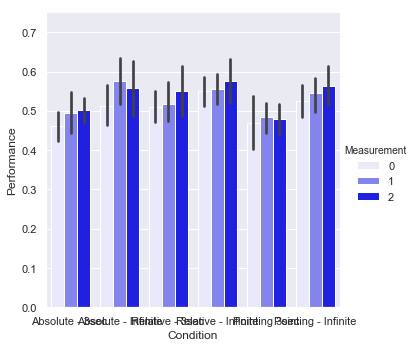

In [131]:
path_rep= 'Data/RepeatedPerformances.csv'
RepeatedPerformances = all_Data = pd.read_csv(path_rep)

conditions = ["Absolute - 3sec ","Absolute - Infinite","Relative - 3sec ","Relative - Infinite","Pointing 3sec","Pointing - Infinite"]
RepeatedAveragedPerformances = RepeatedPerformances.groupby(['Subject', 'Measurement', 'Condition'])['Performance'].mean().reset_index()

ax=sns.catplot(x="Condition", y="Performance",hue='Measurement', data=RepeatedAveragedPerformances, kind='bar', height=5, aspect=1, orient=None, color="blue")
ax.set(ylim=(0, 0.75),xticklabels=conditions)
fig.tight_layout()

In [115]:
# create a usable dataframe for the following analysis
repgroup = RepeatedPerformances.groupby(['Measurement','Subject','Condition'], as_index=False)['Performance'].mean()

RepeatedDf = pd.DataFrame(columns={'Measurement','Subject','Task','Time','Performance'})
tasks = ['Absolute','Absolute','Relative','Relative','Pointing','Pointing']
times = ['3sec','Infinite','3sec','Infinite','3sec','Infinite']
for i in range(270):
    RepeatedDf = RepeatedDf.append({'Subject':repgroup['Subject'][i],'Measurement':repgroup['Measurement'][i],'Task':tasks[repgroup['Condition'][i]],'Time':times[repgroup['Condition'][i]],'Performance':repgroup['Performance'][i]},ignore_index=True)

RepeatedDf

,Task,Performance,Subject,Time,Measurement
0,Absolute,0.444,0,3sec,0
1,Absolute,0.611,0,Infinite,0
2,Relative,0.528,0,3sec,0
3,Relative,0.528,0,Infinite,0
4,Pointing,0.361,0,3sec,0
5,Pointing,0.444,0,Infinite,0
6,Absolute,0.333,2,3sec,0
7,Absolute,0.556,2,Infinite,0
8,Relative,0.611,2,3sec,0
9,Relative,0.556,2,Infinite,0


Using the data of ```RepeatedDf``` we want to calculate a **(three-way) repeated measures ANOVA**. A (three-way) repeated measures ANOVA in general is a statistical test used to determine the effect of three nominal predictor variables (= within-subject factors) on a continuous outcome variable (= dependent variable). 



- What is the dependent variable and what are the within-subject factors that you have to use for the repeated measures ANOVA?
- Formulate the null hypotheses that the repeated measures ANOVA has to test.
- Calculate a repeated measures ANOVA using ```statsmodels```' ```AnovaRM```. 
- Based on the ANOVA table explain which of the null hypotheses can be rejected. What does this outcome tell you?

Take a look at the [ANOVARM documentation](http://www.statsmodels.org/dev/generated/statsmodels.stats.anova.AnovaRM.html#statsmodels.stats.anova.AnovaRM) to get a feeling how to use this function.

In [116]:
res = AnovaRM(RepeatedDf, 'Performance', 'Subject', within=['Task','Measurement','Time'], aggregate_func='mean').fit()
res.summary()

,Num DF,Den DF,F Value,Pr > F
Task,2.0000,28.0000,1.8458,0.1766
Measurement,2.0000,28.0000,2.5727,0.0943
Time,1.0000,14.0000,19.4550,0.0006
Task:Measurement,4.0000,56.0000,0.5986,0.6652
Task:Time,2.0000,28.0000,0.6688,0.5203
Measurement:Time,2.0000,28.0000,0.0726,0.9301
Task:Measurement:Time,4.0000,56.0000,0.2483,0.9095


## Assignment 4: Spatial coverage of Seahaven [Bonus]

To get a better feeling of the spatial coverage of Seahaven, we can create an overview of the houses that the subjects have seen. With a colormap it is easy to display the spatial coverage in an intuitive way.

- Open the image ```map5.png``` as ```SeahavenMap``` and read ```Clicks.csv``` into a dataframe ```NumClicks```.
- Draw a solid circle for each house. Use the x- and y-coordinates of ```NumClicks``` for the positioning of the circles.
- The column "clicks" from ```NumClicks``` displays how many subjects had visited the respective house. Use these click-values to calculate each circle's colour:

$CircleColor = cmap((click[i]-min(clicks))/(max(clicks)-min(clicks)))$

$clicks$: list/array of all click-values from the dataframe ```NumClicks``` <br>
$click[i]$: a certain click-value from the dataframe ```NumClicks``` at position $i$

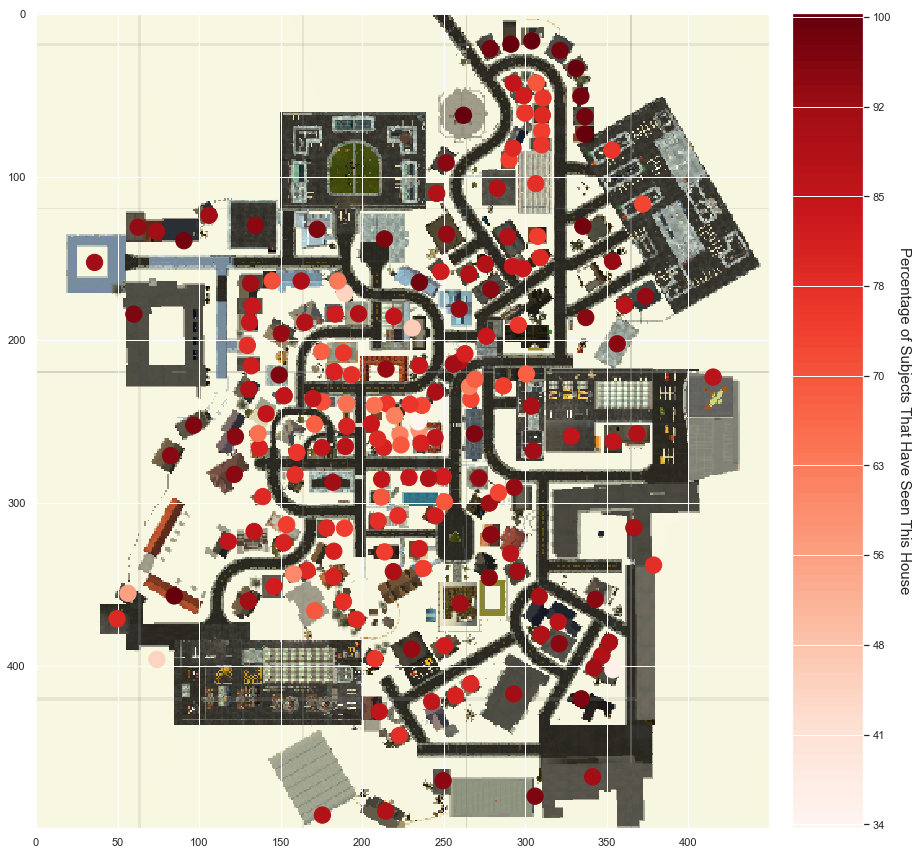

In [4]:
path_img = 'Data/map5.png'
path_clicks = 'Data/Clicks.csv'
SeahavenMap = Image.open(path_img)
NumClicks = pd.read_csv(path_clicks)
clicks = NumClicks['clicks']
NumClicks.head()

# set everything up to display the Seahaven Map
fig = plt.figure(figsize=(15,15))
SeahavenMap = SeahavenMap.resize((450,500))
ax = plt.subplot2grid((10, 10), (0, 0), colspan=9,rowspan=10)
plt.imshow(SeahavenMap, aspect = 'equal')

# choose a colormap for the circles that display the houses
cmap = plt.cm.get_cmap('Reds')

for index, row in NumClicks.iterrows():
    CircleColor = cmap((clicks[index] - min(clicks))/(max(clicks) - min(clicks)))
    circle = plt.Circle((row['x'],row['y']), color=CircleColor)
    ax.add_artist(circle)


# set everything up to display the Colormap / legend for the circle's colors
a=np.outer(np.arange(0,1,0.01),np.ones(3))
ax2 = plt.subplot2grid((10, 10), (0, 9),rowspan=10)
plt.imshow(a,aspect='auto',cmap='Reds',origin="lower")
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks(np.linspace(0,99,10))
ax2.get_yaxis().set_ticklabels(np.linspace((min(clicks)/64)*100,(max(clicks)/64)*100,10,dtype=int))
ax2.yaxis.tick_right()
ax2.set_ylabel("Percentage of Subjects That Have Seen This House",rotation=270, fontsize=15, labelpad=20)
ax2.yaxis.set_label_position("right")
plt.show()